In [491]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [492]:
housing = pd.read_csv('Housing.csv')
housing.head()
M=len(housing)
M 

545

In [493]:
def compute_cost(X,y,theta):
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * M) * np.sum(sqrErrors)
    return J

In [494]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / M) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [495]:
#Problem 1A

In [496]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [497]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [498]:
price = df_train.values[:, 0]
area = df_train.values[:, 1]
bedrooms = df_train.values[:, 2]
bathrooms = df_train.values[:, 3]
stories = df_train.values[:, 4]
parking = df_train.values[:, 10]

M = len(df_train)

#reshape arrays
X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = parking.reshape(M,1)

# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5))
Y = price

In [499]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.0000000001;


#calculated results from the gradient descent
theta, cost_history_train = gradient_descent(X, Y, theta, alpha, iterations)

In [500]:
# test set
# set all variable arrays
price = df_test.values[:, 0]
area = df_test.values[:, 1]
bedrooms = df_test.values[:, 2]
bathrooms = df_test.values[:, 3]
stories = df_test.values[:, 4]
parking = df_test.values[:, 10]

M = len(df_test)

#reshape arrays
X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = parking.reshape(M,1)

# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5))
Y = price

In [501]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.0000000001;

theta, cost_history_test = gradient_descent(X, Y, theta, alpha, iterations)

1705620317417.9792
1540557315308.847


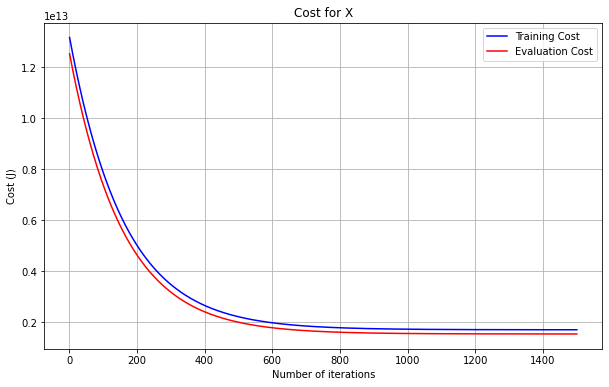

In [502]:
plt.plot(range(1, iterations + 1),cost_history_train, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_test, color='red', label = "Evaluation Cost")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost for X')
print(cost_history_train[-1])
print(cost_history_test[-1])

In [503]:
#Problem 1b

In [504]:
price = df_train.values[:, 0]
area = df_train.values[:, 1]
bedrooms = df_train.values[:, 2]
bathrooms = df_train.values[:, 3]
stories = df_train.values[:, 4]
mainroad = df_train.values[:, 5]
guestroom = df_train.values[:, 6]
basement = df_train.values[:, 7]
hotwaterheating = df_train.values[:, 8]
airconditioning = df_train.values[:, 9]
parking = df_train.values[:, 10]
prefarea = df_train.values[:, 11]

M = len(df_train)

X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = mainroad.reshape(M,1)
X6 = guestroom.reshape(M,1)
X7 = basement.reshape(M,1)
X8 = hotwaterheating.reshape(M,1)
X9 = airconditioning.reshape(M,1)
X10 = parking.reshape(M,1)
X11 = prefarea.reshape(M,1)


# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11))
Y = price

In [505]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.0000000001;
theta, cost_history_test = gradient_descent(X, Y, theta, alpha, iterations)

In [506]:
# Test set
# set all variable arrays
price = df_test.values[:, 0]
area = df_test.values[:, 1]
bedrooms = df_test.values[:, 2]
bathrooms = df_test.values[:, 3]
stories = df_test.values[:, 4]
mainroad = df_test.values[:, 5]
guestroom = df_test.values[:, 6]
basement = df_test.values[:, 7]
hotwaterheating = df_test.values[:, 8]
airconditioning = df_test.values[:, 9]
parking = df_test.values[:, 10]
prefarea = df_test.values[:, 11]

M = len(df_test)

X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = mainroad.reshape(M,1)
X6 = guestroom.reshape(M,1)
X7 = basement.reshape(M,1)
X8 = hotwaterheating.reshape(M,1)
X9 = airconditioning.reshape(M,1)
X10 = parking.reshape(M,1)
X11 = prefarea.reshape(M,1)


# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11))
Y = price

In [507]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.0000000001;

theta, cost_history_test = gradient_descent(X, Y, theta, alpha, iterations)

1705620317417.9792
1540557194973.1301


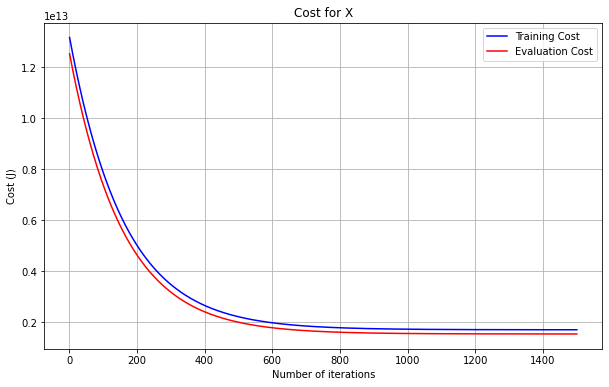

In [508]:
plt.plot(range(1, iterations + 1),cost_history_train, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_test, color='red', label = "Evaluation Cost")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost for X')
print(cost_history_train[-1])
print(cost_history_test[-1])

In [509]:
#Problem 2A  // Input Normalization

In [510]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

normalScaler = MinMaxScaler()
standardScaler = StandardScaler()

In [511]:
np.random.seed(0)
df_NormTrain, df_NormTest = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_NormTest.shape

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df_NormTrain[num_vars] = normalScaler.fit_transform(df_NormTrain[num_vars])
df_NormTest[num_vars] = normalScaler.fit_transform(df_NormTest[num_vars])

# training set
price = df_NormTrain.values[:, 0]
area = df_NormTrain.values[:, 1]
bedrooms = df_NormTrain.values[:, 2]
bathrooms = df_NormTrain.values[:, 3]
stories = df_NormTrain.values[:, 4]
parking = df_NormTrain.values[:, 10]

M = len(df_NormTrain)

X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = parking.reshape(M,1)

# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5))
Y = price

In [512]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;

theta, cost_history_NormTrain = gradient_descent(X, Y, theta, alpha, iterations)

In [513]:
# Test set
price = df_NormTest.values[:, 0]
area = df_NormTest.values[:, 1]
bedrooms = df_NormTest.values[:, 2]
bathrooms = df_NormTest.values[:, 3]
stories = df_NormTest.values[:, 4]
parking = df_NormTest.values[:, 10]

M = len(df_NormTest)

X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = parking.reshape(M,1)

# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5))
Y = price

In [514]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;


theta, cost_history_NormTest = gradient_descent(X, Y, theta, alpha, iterations)

0.007085439749491333
0.005671407495218865


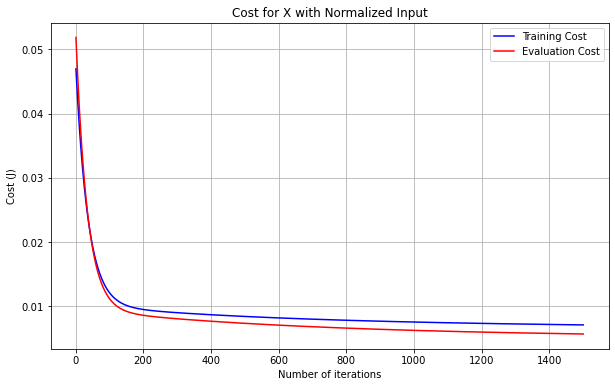

In [515]:
plt.plot(range(1, iterations + 1),cost_history_NormTrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_NormTest, color='red', label = "Evaluation Cost")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost for X with Normalized Input')
print(cost_history_NormTrain[-1])
print(cost_history_NormTest[-1])

In [516]:
#Standarization

In [517]:
np.random.seed(0)
df_StandardTrain, df_StandardTest = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_StandardTest.shape

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df_StandardTrain[num_vars] = standardScaler.fit_transform(df_StandardTrain[num_vars])
df_StandardTest[num_vars] = standardScaler.fit_transform(df_StandardTest[num_vars])

# training set
price = df_StandardTrain.values[:, 0]
area = df_StandardTrain.values[:, 1]
bedrooms = df_StandardTrain.values[:, 2]
bathrooms = df_StandardTrain.values[:, 3]
stories = df_StandardTrain.values[:, 4]
parking = df_StandardTrain.values[:, 10]

M = len(df_StandardTrain)

X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = parking.reshape(M,1)

# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5))
Y = price

In [518]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;

theta, cost_history_StandardTrain = gradient_descent(X, Y, theta, alpha, iterations)

In [519]:
# Test set
price = df_StandardTest.values[:, 0]
area = df_StandardTest.values[:, 1]
bedrooms = df_StandardTest.values[:, 2]
bathrooms = df_StandardTest.values[:, 3]
stories = df_StandardTest.values[:, 4]
parking = df_StandardTest.values[:, 10]

M = len(df_StandardTest)

X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = parking.reshape(M,1)

# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5))
Y = price



In [520]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;


theta, cost_history_StandardTest = gradient_descent(X, Y, theta, alpha, iterations)

0.22309632379615973
0.18509374897517503


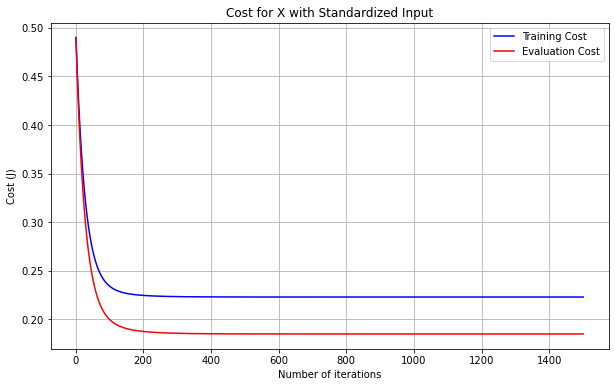

In [521]:
plt.plot(range(1, iterations + 1),cost_history_StandardTrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_StandardTest, color='red', label = "Evaluation Cost")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost for X with Standardized Input')
print(cost_history_StandardTrain[-1])
print(cost_history_StandardTest[-1])

In [522]:
#Problem 2B // Normalization

In [523]:
price = df_NormTrain.values[:, 0]
area = df_NormTrain.values[:, 1]
bedrooms = df_NormTrain.values[:, 2]
bathrooms = df_NormTrain.values[:, 3]
stories = df_NormTrain.values[:, 4]
mainroad = df_NormTrain.values[:, 5]
guestroom = df_NormTrain.values[:, 6]
basement = df_NormTrain.values[:, 7]
hotwaterheating = df_NormTrain.values[:, 8]
airconditioning = df_NormTrain.values[:, 9]
parking = df_NormTrain.values[:, 10]
prefarea = df_NormTrain.values[:, 11]

M = len(df_NormTrain)

X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = mainroad.reshape(M,1)
X6 = guestroom.reshape(M,1)
X7 = basement.reshape(M,1)
X8 = hotwaterheating.reshape(M,1)
X9 = airconditioning.reshape(M,1)
X10 = parking.reshape(M,1)
X11 = prefarea.reshape(M,1)


# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11))
Y = price

In [524]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;


#calculated results from the gradient descent
theta, cost_history_NormTrain = gradient_descent(X, Y, theta, alpha, iterations)

In [525]:
price = df_NormTest.values[:, 0]
area = df_NormTest.values[:, 1]
bedrooms = df_NormTest.values[:, 2]
bathrooms = df_NormTest.values[:, 3]
stories = df_NormTest.values[:, 4]
mainroad = df_NormTest.values[:, 5]
guestroom = df_NormTest.values[:, 6]
basement = df_NormTest.values[:, 7]
hotwaterheating = df_NormTest.values[:, 8]
airconditioning = df_NormTest.values[:, 9]
parking = df_NormTest.values[:, 10]
prefarea = df_NormTest.values[:, 11]

M = len(df_NormTest)

#reshape arrays
X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = mainroad.reshape(M,1)
X6 = guestroom.reshape(M,1)
X7 = basement.reshape(M,1)
X8 = hotwaterheating.reshape(M,1)
X9 = airconditioning.reshape(M,1)
X10 = parking.reshape(M,1)
X11 = prefarea.reshape(M,1)


# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11))
Y = price

In [526]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;


#calculated results from the gradient descent
theta, cost_history_NormTest = gradient_descent(X, Y, theta, alpha, iterations)

0.005093220160815316
0.004134191719301474


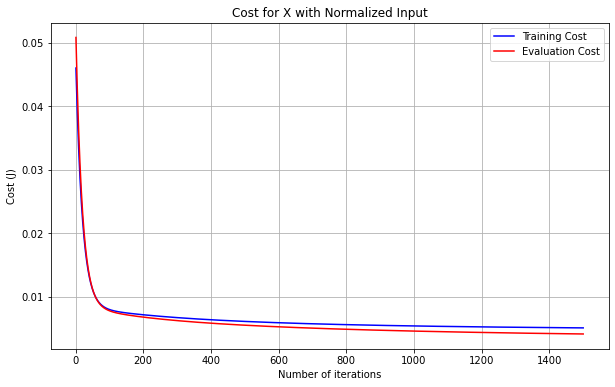

In [527]:
plt.plot(range(1, iterations + 1),cost_history_NormTrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_NormTest, color='red', label = "Evaluation Cost")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost for X with Normalized Input')
print(cost_history_NormTrain[-1])
print(cost_history_NormTest[-1])

In [528]:
#Standarization

In [529]:
price = df_StandardTrain.values[:, 0]
area = df_StandardTrain.values[:, 1]
bedrooms = df_StandardTrain.values[:, 2]
bathrooms = df_StandardTrain.values[:, 3]
stories = df_StandardTrain.values[:, 4]
mainroad = df_StandardTrain.values[:, 5]
guestroom = df_StandardTrain.values[:, 6]
basement = df_StandardTrain.values[:, 7]
hotwaterheating = df_StandardTrain.values[:, 8]
airconditioning = df_StandardTrain.values[:, 9]
parking = df_StandardTrain.values[:, 10]
prefarea = df_StandardTrain.values[:, 11]

M = len(df_StandardTrain)

#reshape arrays
X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = mainroad.reshape(M,1)
X6 = guestroom.reshape(M,1)
X7 = basement.reshape(M,1)
X8 = hotwaterheating.reshape(M,1)
X9 = airconditioning.reshape(M,1)
X10 = parking.reshape(M,1)
X11 = prefarea.reshape(M,1)


# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11))
Y = price

In [530]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;


#calculated results from the gradient descent
theta, cost_history_StandardTrain = gradient_descent(X, Y, theta, alpha, iterations)

In [531]:
price = df_StandardTest.values[:, 0]
area = df_StandardTest.values[:, 1]
bedrooms = df_StandardTest.values[:, 2]
bathrooms = df_StandardTest.values[:, 3]
stories = df_StandardTest.values[:, 4]
mainroad = df_StandardTest.values[:, 5]
guestroom = df_StandardTest.values[:, 6]
basement = df_StandardTest.values[:, 7]
hotwaterheating = df_StandardTest.values[:, 8]
airconditioning = df_StandardTest.values[:, 9]
parking = df_StandardTest.values[:, 10]
prefarea = df_StandardTest.values[:, 11]

M = len(df_StandardTest)

#reshape arrays
X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = mainroad.reshape(M,1)
X6 = guestroom.reshape(M,1)
X7 = basement.reshape(M,1)
X8 = hotwaterheating.reshape(M,1)
X9 = airconditioning.reshape(M,1)
X10 = parking.reshape(M,1)
X11 = prefarea.reshape(M,1)


# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11))
Y = price

In [532]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;


#calculated results from the gradient descent
theta, cost_history_StandardTest = gradient_descent(X, Y, theta, alpha, iterations)

0.16415713474013202
0.13271415048756507


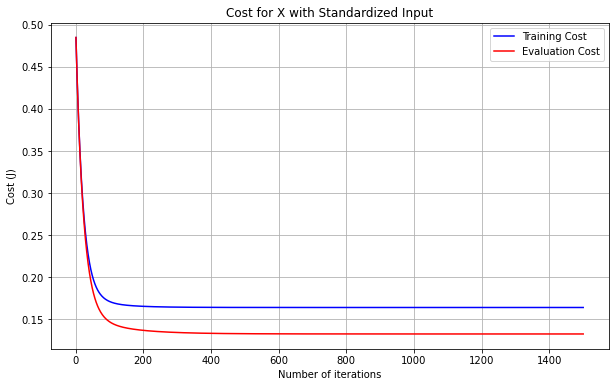

In [533]:
plt.plot(range(1, iterations + 1),cost_history_StandardTrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_StandardTest, color='red', label = "Evaluation Cost")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost for X with Standardized Input')
print(cost_history_StandardTrain[-1])
print(cost_history_StandardTest[-1])